In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading of Files<a></a>
dataset = pd.read_csv('AB_NYC_2019.csv')
dataset.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

We need to determine the number of rows and columns in the dataset. Additionally, it's important to check the number of unique values in each column using the nunique function.

The dataset contains 48,895 rows and 16 columns.

In [3]:
print('\nRows : ',dataset.shape[0])
print('\nColumns :', dataset.shape[1])
print('\nColumns:',dataset.columns.to_list())
print(' \nUnique:\n',dataset.nunique())


Rows :  48895

Columns : 16

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
 
Unique:
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


# Plotting the dataset in a map
Since our dataset includes latitude and longitude coordinates, we can use the Folium library to visualize the data on a map. This interactive map allows zooming in to explore individual locations in detail. We set the initial zoom level to 9 to ensure that clusters of locations are clearly visible.

In [6]:
# Import necessary libraries
import folium  # Folium is used to create interactive maps
from folium.plugins import FastMarkerCluster  # FastMarkerCluster is used to group nearby points for better visualization


# Load dataset
dataset = pd.read_csv("AB_NYC_2019.csv")  # Make sure the CSV file is in the same directory or provide the full path

# Define the central coordinates for the map (New York City)
Long = -73.80  # Longitude
Lat = 40.80    # Latitude

# Extract latitude and longitude from the dataset
locations = list(zip(dataset.latitude, dataset.longitude))

# Create a map centered around the defined coordinates
map1 = folium.Map(location=[Lat, Long], zoom_start=9)

# Add Airbnb locations as clustered markers for better visualization
FastMarkerCluster(data=locations).add_to(map1)

# Display the map
map1


To handle missing values in the reviews_per_month column, we will replace NaN values with 0.

In [7]:
dataset.fillna({'reviews_per_month':0},inplace=True)

# Scatter Plot to Visualize Neighbourhood Groups Based on Latitude and Longitude

We will create a scatter plot using the latitude and longitude values to visualize the distribution of neighbourhood groups. This will help us observe clustering patterns, similar to how we did with the Folium map.

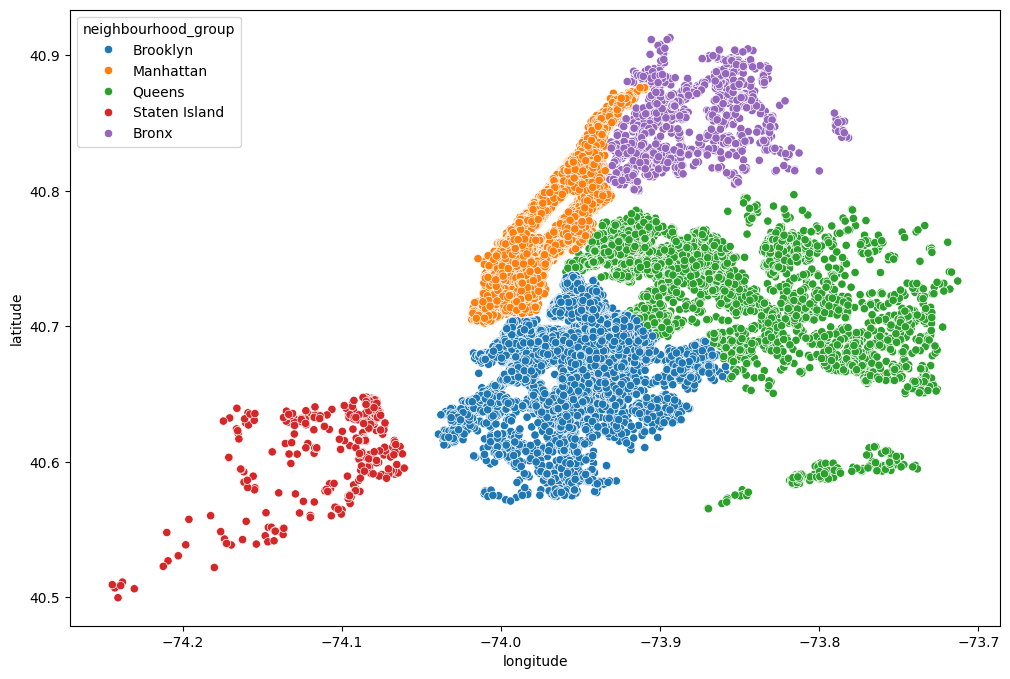

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dataset.longitude,y=dataset.latitude,hue=dataset.neighbourhood_group)
plt.show()

# Unique Values Analysis

Analyzing unique values is crucial as it provides valuable insights into the data and user preferences. In this case, we will focus on two key columns: Room Type and Neighbourhood Group.

The dataset contains 3 types of rooms and 5 different neighbourhood groups. In the following sections, we will delve deeper into these categories to better understand user distribution and preferences.

In [9]:
print('Unique value for room_type are :',dataset.room_type.unique())
print('Unique value for neighbourhood_group are :',dataset.neighbourhood_group.unique())

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Shared room']
Unique value for neighbourhood_group are : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


# Room Types and Neighbourhood Groups

We will begin by examining the distribution of room types by grouping the data. From the analysis, it is clear that Apartment and Private rooms are more prevalent than Shared rooms. Generally, shared rooms tend to be less expensive and are popular among travelers who frequently move between cities. Although the data for shared rooms is limited, we will still explore these details to uncover valuable insights.

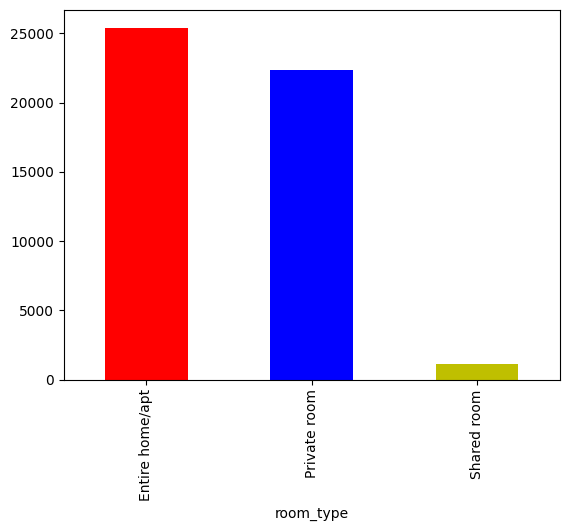

In [10]:
dataset['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()

# Top 10 Apartment Listings
Below, we display the listings for Entire Home/Apartment rentals. Notably, Sonder (NYC) has an unusually high count, which appears odd. To investigate further, we will cross-check these listings and identify if they represent genuine hotels or if there is any discrepancy in the data. By using the latitude and longitude values, we can verify the accuracy of the listings and ensure that only legitimate entries are included.

In [11]:
apt = dataset[dataset['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

host_id     host_name       neighbourhood neighbourhood_group  \
20211  219517861  Sonder (NYC)  Financial District           Manhattan   
6449     7503643          Vida          Greenpoint            Brooklyn   
8430    12243051        Sonder  Financial District           Manhattan   
20214  219517861  Sonder (NYC)         Murray Hill           Manhattan   
17832  120762452       Stanley         Murray Hill           Manhattan   
19900  205031545    Red Awning             Midtown           Manhattan   
12273   30283594          Kara      Hell's Kitchen           Manhattan   
17451  107434423    Blueground             Chelsea           Manhattan   
17628  113805886        Yaacov     Upper East Side           Manhattan   
12275   30283594          Kara             Midtown           Manhattan   

       apartment  
20211        210  
6449          52  
8430          51  
20214         50  
17832         49  
19900         49  
12273         41  
17451         37  
17628         33  
12275         33

# Lets see the Sonder (NYC)

Seeing the below latitude and longitude it is clear that it is in the same building.

In [12]:
sonder_data = dataset[dataset['host_name']=='Sonder (NYC)']
sonder_data_by = sonder_data[['host_id','host_name','neighbourhood','latitude','longitude']]
sonder_data_by.head(5)

host_id     host_name       neighbourhood  latitude  longitude
38293  219517861  Sonder (NYC)  Financial District  40.70637  -74.00645
38294  219517861  Sonder (NYC)  Financial District  40.70771  -74.00641
38588  219517861  Sonder (NYC)  Financial District  40.70743  -74.00443
39769  219517861  Sonder (NYC)         Murray Hill  40.74792  -73.97614
39770  219517861  Sonder (NYC)         Murray Hill  40.74771  -73.97528

# Top 10 Private Room Listings
We will perform the same analysis for both Private Rooms and Shared Rooms. Additionally, we will investigate the top hoteliers to determine if their listings are concentrated in the same location or spread across different areas. This will help us understand the distribution and identify any potential patterns or discrepancies.

In [14]:
private = dataset[dataset['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

host_id host_name       neighbourhood  private
15261  190921808      John      Hell's Kitchen       44
14025  137358866    Kazuya            Woodside       35
16301  238321374      Eyal     Upper West Side       32
15984  224414117   Gabriel      Hell's Kitchen       30
16035  226410657      Nina  Bedford-Stuyvesant       26
16144  230192510      Zach         Fort Greene       25
16386  242962235     Yuval           Ridgewood       23
16539  252604696      Erin             Chelsea       20
14024  137358866    Kazuya           Sunnyside       17
15761  216235179      Nina            Bushwick       17

# Location wise Private room

In [15]:
private_data = dataset[dataset['host_name']=='John']
private_data_by = private_data[['host_id','host_name','neighbourhood','latitude','longitude']]
private_data_by.head()

host_id host_name      neighbourhood  latitude  longitude
0        2787      John         Kensington  40.64749  -73.97237
429    715807      John  Greenwich Village  40.72831  -74.00177
620   1229984      John   Long Island City  40.74581  -73.95295
991   1488809      John           Bushwick  40.70339  -73.92945
1141  2397411      John       Clinton Hill  40.68545  -73.96534

# Shared Room Exploration

In [16]:
private = dataset[dataset['room_type']=='Shared room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)

host_id   host_name       neighbourhood  shared
339   39528519         Max     Lower East Side      23
529  119669058     Melissa  Bedford-Stuyvesant      18
651  201015598      Anchor  Bedford-Stuyvesant      17
618  175730239   Baboucarr           Sunnyside      10
663  209386156     Abraham         East Harlem       9
727  253906467        Erik      Hell's Kitchen       9
635  187975743     R.Henry      Hell's Kitchen       8
292   30509656        Orit         Port Morris       8
714  248161322      Sergii            Bushwick       8
686  223087887  Jess & Ana              Corona       8

# Exploration of Neighbourhood Group
Now, let's explore the Neighbourhood Group to analyze the data distribution. From the analysis, it appears that Manhattan and Brooklyn have a higher number of listings compared to Queens, Bronx, and Staten Island. This gives us a better understanding of where the majority of Airbnb listings are concentrated.Exploration of Neighbourhood Group
Now, let's explore the Neighbourhood Group to analyze the data distribution. From the analysis, it appears that Manhattan and Brooklyn have a higher number of listings compared to Queens, Bronx, and Staten Island. This gives us a better understanding of where the majority of Airbnb listings are concentrated.

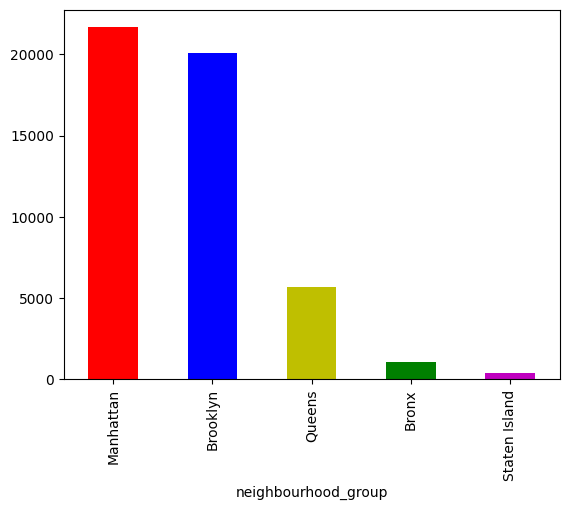

In [17]:
dataset['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()

In [18]:
private = dataset[dataset['neighbourhood_group']=='Manhattan']
list_private = private.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(10)

host_id     host_name       neighbourhood neighbourhood_group  count
15621  219517861  Sonder (NYC)  Financial District           Manhattan    218
5701    12243051        Sonder  Financial District           Manhattan     51
15624  219517861  Sonder (NYC)         Murray Hill           Manhattan     50
13768  120762452       Stanley         Murray Hill           Manhattan     50
15380  205031545    Red Awning             Midtown           Manhattan     49
15150  190921808          John      Hell's Kitchen           Manhattan     46
8892    30283594          Kara      Hell's Kitchen           Manhattan     41
13463  107434423    Blueground             Chelsea           Manhattan     37
8894    30283594          Kara             Midtown           Manhattan     33
13622  113805886        Yaacov     Upper East Side           Manhattan     33

# Price Exploration
We will first check for any null values in the price column. From the analysis below, it appears that there are no null values in the price column, so we don't need to address any missing data in this case.

In [19]:
dataset.price.isna().sum()

np.int64(0)

# Price Data Summary
Let's quickly summarize the price data. According to the summary statistics, the price ranges from $0 to $180. However, there are also listings with prices as high as $10,000. While this may seem like an outlier, we cannot discard it immediately, as the price can vary significantly based on factors such as location, room type, neighbourhood, season, and other variables. Additionally, some listings have a price of $0, which could be due to dynamic pricing or the host's decision not to share the price on Airbnb.

To better understand the distribution, we will plot a boxplot to visualize how the price data is spread, especially for higher price ranges, regardless of the region.

In [20]:
dataset['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

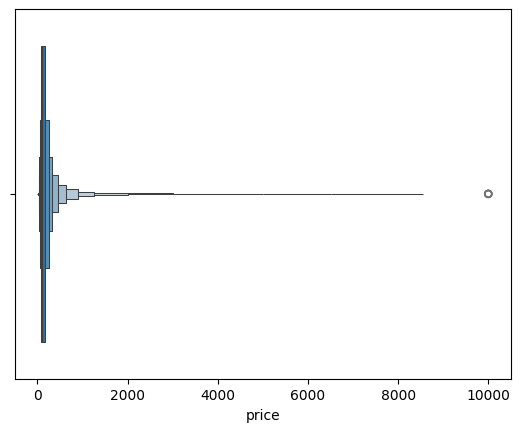

In [21]:
figsize=(12,8)
sns.boxenplot(x='price',data=dataset)

# Average Room Rent for Locality
For any traveler, the price is a critical factor as it determines the budget for their trip. In the analysis below, we will calculate the average price per night based on different room types and neighbourhood groups.

As expected, renting an entire apartment is generally more expensive than staying in a shared room or private room in any locality. This is because an entire apartment is usually rented by a family or group, offering privacy and more comfort. On the other hand, shared rooms are often preferred by travelers who don't stay long in one place and prefer a more affordable option.

# Key Insights from the Analysis:

1) Shared Room in Staten Island is the cheapest per night, while renting an Entire Apartment/Home in Manhattan is the most expensive.

2) The average price for a Private Room is also quite high in Manhattan, making it more expensive than other neighbourhoods. Similarly, the Shared Room in Manhattan is pricier than shared rooms in other areas, reinforcing the idea that Manhattan is one of the most expensive places to stay.

3) Bronx offers the cheapest stays compared to other neighbourhood groups, regardless of room type.

4) Although Shared Rooms in Staten Island are the cheapest, Apartments in Staten Island are not the least expensive. This could be because Staten Island serves as a peaceful getaway, offering a more serene environment for family gatherings, away from the city's hustle and bustle.

In the next step, we will also list the average price per room type for each neighbourhood group, which will help tourists plan their stay based on their budget. Let me know what you think about the findings!

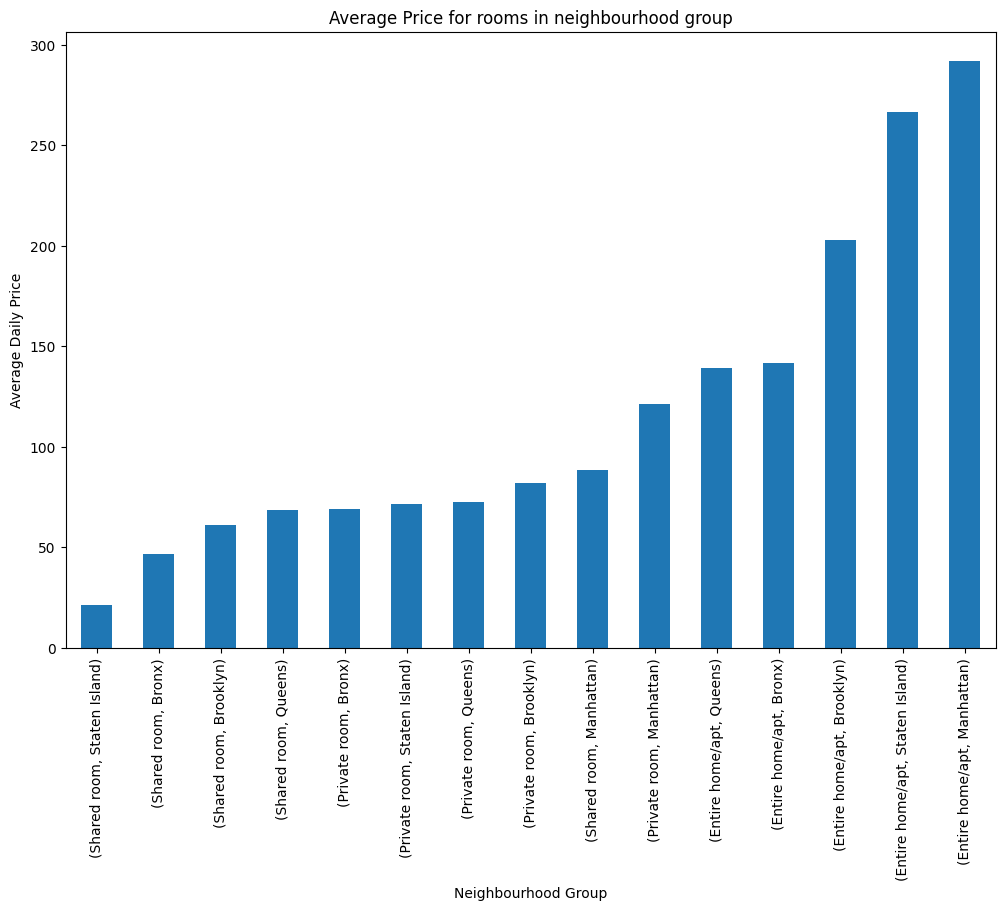

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [22]:
dataset.head()
plt.figure(figsize=(12,8))
df = dataset[dataset['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

# Expensive Neighbourhoods
So far, we've analyzed data at the neighbourhood group level, but now it's time to dive deeper into individual neighbourhoods. This is crucial for understanding the price variation at a more granular level, as certain neighbourhoods can have significantly higher or lower price margins for travelers. Let's explore further.

We will now plot the most expensive neighbourhoods by focusing on the Top 15 and Bottom 15 neighbourhoods based on the average price per night. This will provide valuable insights for travelers to make informed decisions when choosing a neighbourhood that fits their budget.

From the plot below, we can see that Fort Wadsworth emerges as the most expensive neighbourhood, while Bull's Head is the least expensive place to stay. This will help travelers choose an area that aligns with their financial preferences.

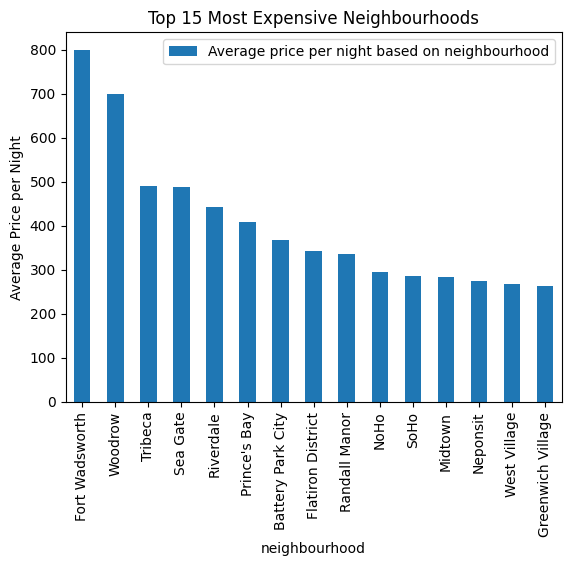

                   Average price per night based on neighbourhood
neighbourhood                                                    
Fort Wadsworth                                         800.000000
Woodrow                                                700.000000
Tribeca                                                490.638418
Sea Gate                                               487.857143
Riverdale                                              442.090909
Prince's Bay                                           409.500000
Battery Park City                                      367.557143
Flatiron District                                      341.925000
Randall Manor                                          336.000000
NoHo                                                   295.717949
SoHo                                                   287.103352
Midtown                                                282.719094
Neponsit                                               274.666667
West Villa

In [30]:
# Step 1: Clean the 'price' column to remove non-numeric characters
dataset['price'] = dataset['price'].replace({r'\$': '', r',': ''}, regex=True)

# Step 2: Convert 'price' to numeric, forcing errors to NaN
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')

# Step 3: Drop rows where 'price' is NaN
dataset = dataset.dropna(subset=['price'])

# Step 4: Group by 'neighbourhood' and calculate the mean price
df4 = dataset.groupby("neighbourhood")[["price"]].agg("mean").sort_values(by="price", ascending=False).rename(
    columns={"price": "Average price per night based on neighbourhood"}).head(15)

# Step 5: Plot the top 15 most expensive neighbourhoods
df4.plot(kind='bar')
plt.title('Top 15 Most Expensive Neighbourhoods')
plt.ylabel('Average Price per Night')
plt.show()

# Display the DataFrame
print(df4)

Least expensive neighbourhood according to Airbnb listings are


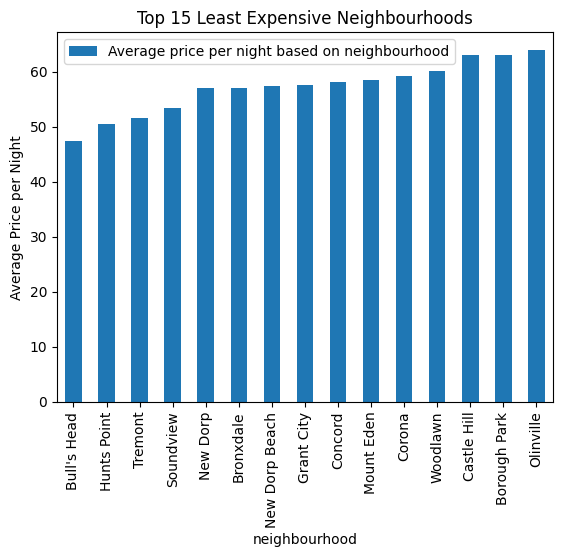

                Average price per night based on neighbourhood
neighbourhood                                                 
Bull's Head                                          47.333333
Hunts Point                                          50.500000
Tremont                                              51.545455
Soundview                                            53.466667
New Dorp                                             57.000000
Bronxdale                                            57.105263
New Dorp Beach                                       57.400000
Grant City                                           57.666667
Concord                                              58.192308
Mount Eden                                           58.500000
Corona                                               59.171875
Woodlawn                                             60.090909
Castle Hill                                          63.000000
Borough Park                                         63

In [32]:
# Step 1: Clean the 'price' column to remove non-numeric characters
dataset['price'] = dataset['price'].replace({r'\$': '', r',': ''}, regex=True)

# Step 2: Convert 'price' to numeric, forcing errors to NaN
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')

# Step 3: Drop rows where 'price' is NaN
dataset = dataset.dropna(subset=['price'])

# Step 4: Group by 'neighbourhood' and calculate the mean price (taking the last 15 least expensive neighbourhoods)
print('Least expensive neighbourhood according to Airbnb listings are')
df4 = dataset.groupby("neighbourhood")[["price"]].agg("mean").sort_values(by="price", ascending=True).rename(
    columns={"price": "Average price per night based on neighbourhood"}).head(15)

# Step 5: Plot the least expensive neighbourhoods
df4.plot(kind='bar')
plt.title('Top 15 Least Expensive Neighbourhoods')
plt.ylabel('Average Price per Night')
plt.show()

# Display the DataFrame
print(df4)

# Neighbourhoods with the Most and Least Listings

We now aim to determine the number of listings per neighbourhood. From this analysis, we can see that Williamsburg has the highest number of listings, while Fort Wadsworth has one of the least, with just a single listing.

Below, I have listed the top 15 neighbourhoods with the most listings as well as the bottom 15 neighbourhoods with the least listings.

Interestingly, Williamsburg, which ranks as one of the most expensive neighbourhoods in terms of price, also has a high number of listings. This suggests that the price may be influenced by the number of available listings — with fewer listings in some neighbourhoods, such as Fort Wadsworth, leading to higher prices due to limited availability.

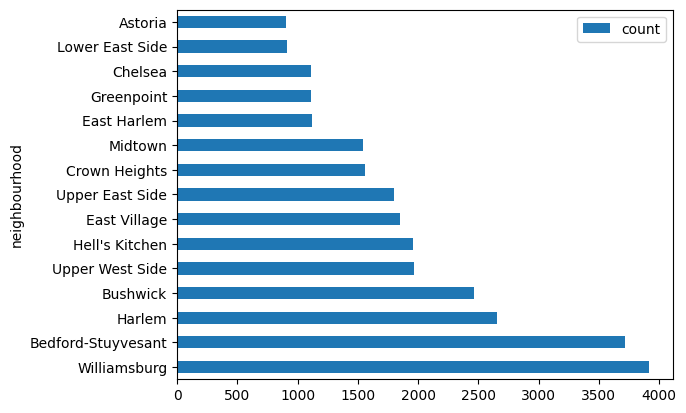

count
neighbourhood            
Williamsburg         3919
Bedford-Stuyvesant   3714
Harlem               2656
Bushwick             2464
Upper West Side      1970
Hell's Kitchen       1955
East Village         1853
Upper East Side      1797
Crown Heights        1563
Midtown              1545
East Harlem          1116
Greenpoint           1113
Chelsea              1112
Lower East Side       911
Astoria               900

In [33]:
df5 = dataset.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.head(15))

Least Listing number of count


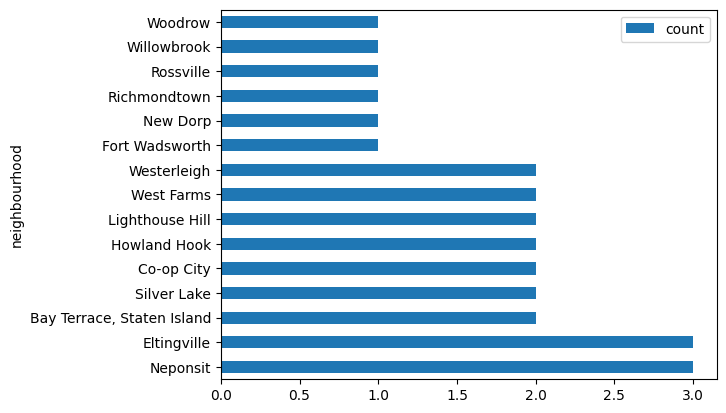

count
neighbourhood                    
Neponsit                        3
Eltingville                     3
Bay Terrace, Staten Island      2
Silver Lake                     2
Co-op City                      2
Howland Hook                    2
Lighthouse Hill                 2
West Farms                      2
Westerleigh                     2
Fort Wadsworth                  1
New Dorp                        1
Richmondtown                    1
Rossville                       1
Willowbrook                     1
Woodrow                         1

In [34]:
print('Least Listing number of count')
df5 = dataset.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.tail(15))

# Location and Review Score

Reviews have become a crucial factor when it comes to online bookings these days. They provide valuable insights into a place, which can significantly influence a tourist's decision. A low-priced location with poor reviews may discourage tourists from booking, while an expensive place with excellent reviews can attract tourists, often leading them to spend more than they initially planned.

In this analysis, we aim to explore the relationship between review scores and locations across different neighbourhoods. Due to limited data on reviews, we’ll focus on properties that have more than 50 reviews, ensuring that we have enough data for meaningful insights.

As shown in the plot below, Brooklyn received the most reviews compared to Manhattan, which is an interesting observation. On the other hand, Staten Island, despite being more affordable, has fewer reviews than the other neighbourhood groups. However, due to the limited dataset, we cannot delve deeper into why this might be the case.

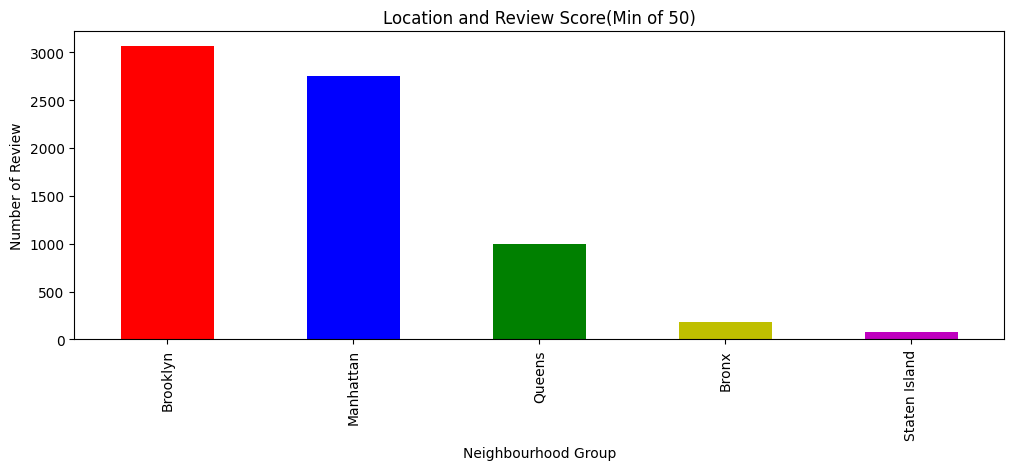

 Count of Review v/s neighbourhood group


count
neighbourhood_group       
Brooklyn              3065
Manhattan             2751
Queens                 997
Bronx                  187
Staten Island           81

In [35]:
fig = plt.figure(figsize=(12,4))
review_50 = dataset[dataset['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

# Location and Review Score

Reviews play a key role in online bookings today, offering crucial insights into a place that can influence a tourist's decision. A low-priced property with negative reviews might drive away potential guests, while an expensive property with positive reviews could encourage tourists to spend more than they initially intended.

For this analysis, we’ll focus on properties that have received more than 50 reviews, as this gives us a better understanding of the data.

Looking at the results, Brooklyn stands out with the most reviews, outpacing Manhattan. Interestingly, Staten Island, which has lower prices, receives fewer reviews compared to the other neighbourhood groups. However, due to the limited review data, we cannot explore the reasons behind this trend in depth.

# Host_name_chart
Below plot shows the Top 5 host and it looks like Michael has received more reviews for topping the chart .

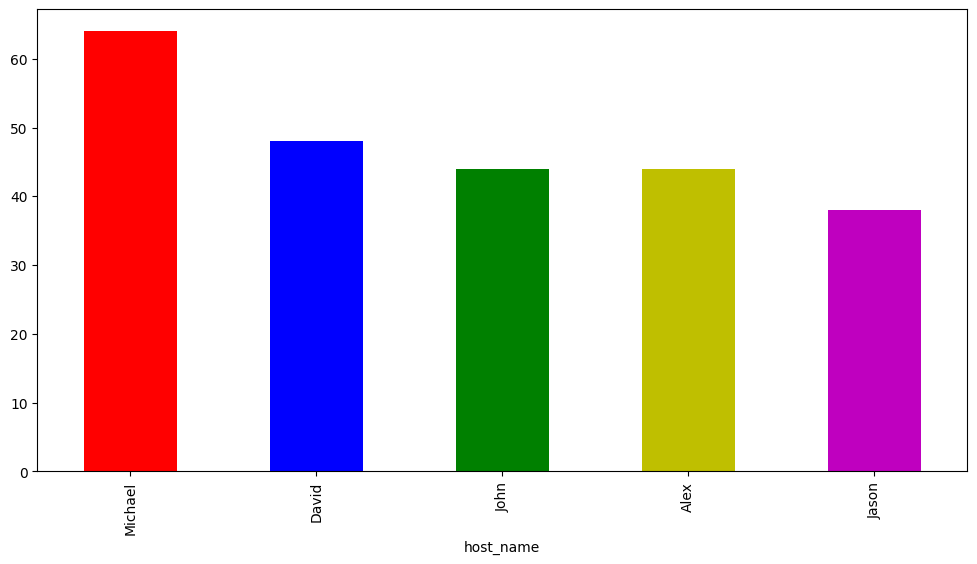

In [45]:
plt.figure(figsize=(12,6))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])
#sns.barplot(x=df1.index,y=df1.values)

# Plotting Price Based on Availability (365)
We created a scatterplot to examine whether there's any noticeable price trend based on availability, specifically when the availability is set to 365 days. Upon analyzing the plot, it’s difficult to draw a clear conclusion. However, one observation is that as the availability reaches 365 days, the price seems to increase, with a few listings reaching up to 10K.

<Axes: xlabel='availability_365', ylabel='price'>

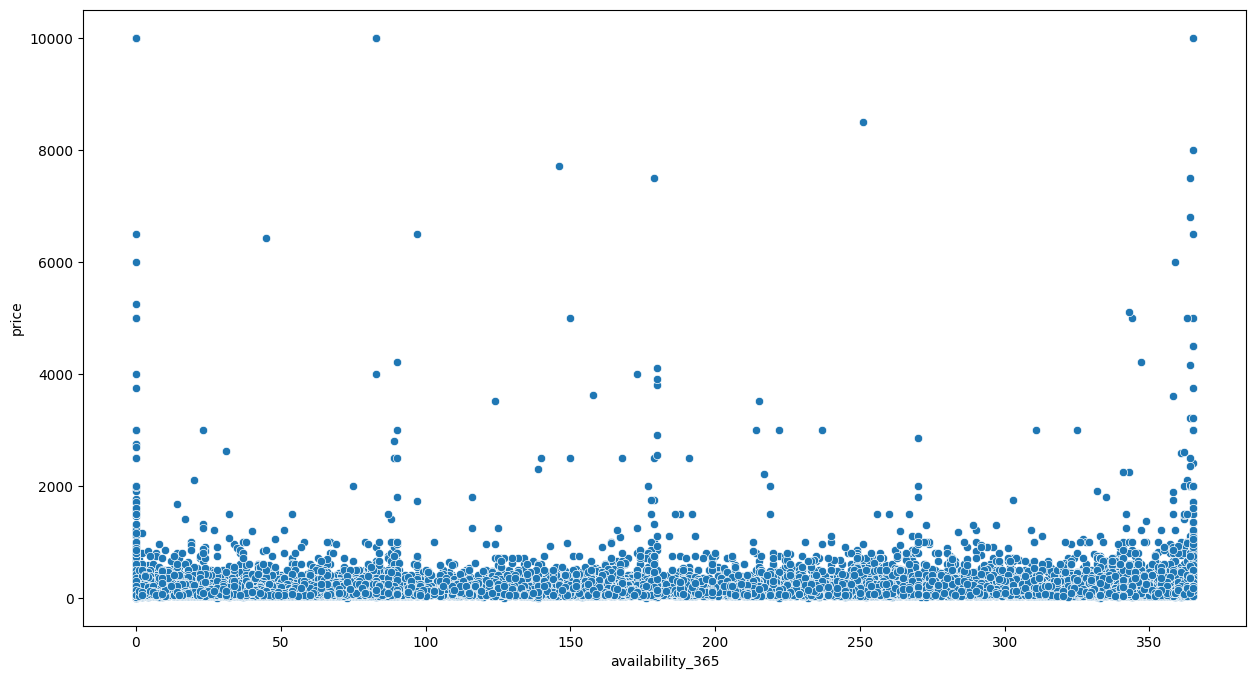

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=dataset['price'],x=dataset['availability_365'])

# Average Listing for each Neighbourhood group

In [48]:
# Select only numeric columns for grouping and averaging
numeric_cols = review_50.select_dtypes(include='number').columns
df6 = review_50.groupby(['neighbourhood_group','room_type'])[numeric_cols].mean()

# Drop irrelevant columns if needed
df6 = df6.drop(['id','calculated_host_listings_count','reviews_per_month'], axis=1, errors='ignore')

# Sort by neighbourhood_group
df6 = df6.sort_values('neighbourhood_group')

# Display the result
pd.DataFrame(df6)


host_id   latitude  longitude  \
neighbourhood_group room_type                                             
Bronx               Entire home/apt  6.834402e+07  40.845571 -73.874437   
                    Private room     5.771343e+07  40.848007 -73.894449   
                    Shared room      8.610883e+07  40.840340 -73.830070   
Brooklyn            Entire home/apt  3.800371e+07  40.681820 -73.950473   
                    Private room     3.718687e+07  40.684031 -73.948452   
                    Shared room      3.795770e+07  40.668842 -73.941362   
Manhattan           Entire home/apt  3.753960e+07  40.760908 -73.975440   
                    Private room     4.220649e+07  40.776921 -73.968273   
                    Shared room      7.222840e+07  40.772727 -73.972424   
Queens              Entire home/apt  6.497462e+07  40.728087 -73.864378   
                    Private room     7.468608e+07  40.733657 -73.863445   
                    Shared room      9.552170e+07  40.716744 -73.843495   
Staten Island       Entire home/apt  7.416233e+07  40.615301 -74.098382   
                    Private room     5.922092e+07  40.622883 -74.096828   

                                          price  minimum_nights  \
neighbourhood_group room_type                                     
Bronx               Entire home/apt  107.000000        2.212500   
                    Private room      53.132075        2.084906   
                    Shared room       20.000000        1.000000   
Brooklyn            Entire home/apt  158.782955        3.921023   
                    Private room      71.594192        2.731554   
                    Shared room       40.806452        1.967742   
Manhattan           Entire home/apt  218.531682        4.694829   
                    Private room      97.856049        3.114855   
                    Shared room       62.444444        1.916667   
Queens              Entire home/apt  124.053012        2.725301   
                    Private room      61.807356        2.402802   
                    Shared room       43.181818        1.363636   
Staten Island       Entire home/apt  105.652174        3.108696   
                    Private room      54.714286        2.857143   

                                     number_of_reviews  availability_365  
neighbourhood_group room_type                                             
Bronx               Entire home/apt         101.325000        197.387500  
                    Private room            100.566038        177.660377  
                    Shared room             116.000000          5.000000  
Brooklyn            Entire home/apt         109.513068        171.889773  
                    Private room            109.997645        155.525118  
                    Shared room             105.322581        163.258065  
Manhattan           Entire home/apt         106.798980        157.758194  
                    Private room            117.383614        144.607198  
                    Shared room              92.916667        170.402778  
Queens              Entire home/apt         104.643373        184.932530  
                    Private room            116.199650        187.637478  
                    Shared room             122.454545        170.727273  
Staten Island       Entire home/apt          95.065217        197.217391  
                    Private room            105.742857        270.742857